In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
zf = zipfile.ZipFile('dataSet.zip') 
df = pd.read_csv(zf.open('37100122.csv'))
df.head()

,REF_DATE,GEO,DGUID,Educational qualification,Field of study,Gender,Age group,Status of student in Canada,Characteristics after graduation,Graduate statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,All graduates,Number of graduates,Number,223,units,0,v1007918655,1.1.1.1.1.1.1.1,321930.0,NaN,NaN,NaN,0
1,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates with no income information,Number of graduates,Number,223,units,0,v1007918656,1.1.1.1.1.1.2.1,57460.0,NaN,NaN,NaN,0
2,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Full-time students,Number of graduates,Number,223,units,0,v1007918657,1.1.1.1.1.1.3.1,50920.0,NaN,NaN,NaN,0
3,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,Graduates reporting employment income,Number of graduates,Number,223,units,0,v1007918658,1.1.1.1.1.1.4.1,213545.0,NaN,NaN,NaN,0
4,2010,Canada,2016A11124,"Total, educational qualification","Total, field of study","Total, gender",15 to 64 years,Canadian and international students,"Graduates reporting wages, salaries and commis...",Number of graduates,Number,223,units,0,v1007918659,1.1.1.1.1.1.5.1,190120.0,NaN,NaN,NaN,0


In [3]:
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Educational qualification',
       'Field of study', 'Gender', 'Age group', 'Status of student in Canada',
       'Characteristics after graduation', 'Graduate statistics', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [0]:
vGraduate_statistics = ['Graduates reporting employment income','Graduates reporting wages, salaries and commissions only']
df = df.loc[df['Characteristics after graduation'].isin(vGraduate_statistics)]
df = df.loc[df['Graduate statistics'] == 'Median employment income']


In [0]:
df = df.rename({'Educational qualification':'Accreditation_type'},axis=1)
df = df.rename({'VALUE':'Income'},axis=1) #rename relevant columns

In [6]:
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Accreditation_type', 'Field of study',
       'Gender', 'Age group', 'Status of student in Canada',
       'Characteristics after graduation', 'Graduate statistics', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'Income', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [7]:
df.Accreditation_type.unique() #find all possible accreditation types

array(['Career, technical or professional training short credential',
       'Career, technical or professional training certificate',
       'Career, technical or professional training diploma',
       'Other career, technical or professional training credential',
       'Post career, technical or professional training program certificate',
       'Post career, technical or professional training program diploma',
       'Pre-university certificate', 'Undergraduate certificate',
       'Undergraduate associate degree', 'Undergraduate diploma',
       'Undergraduate degree',
       'Post-baccalaureate non-graduate certificate',
       'Post-baccalaureate non-graduate diploma',
       'Post-baccalaureate non-graduate degree', 'Professional degree',
       'Health-related residency program certificate',
       'Health-related residency program diploma', "Master's certificate",
       "Master's diploma", "Master's degree",
       "Other master's-level credential", 'Doctoral-level certifica

In [8]:
#Create new DataFrame with only relevant columns
df = pd.DataFrame(df[['Accreditation_type','Income']])
df.head()

,Accreditation_type,Income
5263,"Career, technical or professional training sho...",35100.0
5265,"Career, technical or professional training sho...",36700.0
5270,"Career, technical or professional training sho...",35200.0
5272,"Career, technical or professional training sho...",36800.0
5277,"Career, technical or professional training sho...",33900.0


In [9]:
#Create new DataFrame for all certificate programs except Master's and Doctoral certificates
certificate =  df[(df['Accreditation_type']=='Career, technical or professional training certificate') | 
          (df['Accreditation_type']=='Post career, technical or professional training program certificate') |
          (df['Accreditation_type']=='Pre-university certificate') |
          (df['Accreditation_type']=='Undergraduate certificate') |
          (df['Accreditation_type']=='Post-baccalaureate non-graduate certificate') |
          (df['Accreditation_type']=='Health-related residency program certificate') |
          (df['Accreditation_type']=='Other postsecondary certificate')]
            
certificate = certificate.dropna()
certificate.head()
                      

,Accreditation_type,Income
9853,"Career, technical or professional training cer...",37100.0
9855,"Career, technical or professional training cer...",37700.0
9860,"Career, technical or professional training cer...",37100.0
9862,"Career, technical or professional training cer...",37800.0
9867,"Career, technical or professional training cer...",35900.0


In [10]:
#Find average income of all certificate programs
A = certificate['Income'].median()
print (A)

40000.0


In [11]:
#Create new DataFrame for all diploma programs except Doctoral programs
diploma =  df[(df['Accreditation_type']=='Career, technical or professional training diploma') | 
          (df['Accreditation_type']=='Post career, technical or professional training program diploma') |
          (df['Accreditation_type']=='Undergraduate diploma') |
          (df['Accreditation_type']=='Post-baccalaureate non-graduate diploma') |
          (df['Accreditation_type']=='Health-related residency program diploma') |
          (df['Accreditation_type']=='Other postsecondary diploma')]

diploma = diploma.dropna()
diploma.head()

,Accreditation_type,Income
15004,"Career, technical or professional training dip...",39700.0
15006,"Career, technical or professional training dip...",40400.0
15011,"Career, technical or professional training dip...",39900.0
15013,"Career, technical or professional training dip...",40700.0
15018,"Career, technical or professional training dip...",39100.0


In [12]:
#Find average income of all diploma programs
B=diploma['Income'].median()
print(B)

41500.0


In [13]:
#Create new DataFrame for all non-graduate level degree programs
degree =  df[(df['Accreditation_type']=='Undergraduate associate degree') | 
          (df['Accreditation_type']=='Undergraduate degree') |
          (df['Accreditation_type']=='Post-baccalaureate non-graduate degree') |
          (df['Accreditation_type']=='Professional degree') |
          (df['Accreditation_type']=='Other postsecondary degree')]

degree = degree.dropna()
degree.head()

,Accreditation_type,Income
31414,Undergraduate associate degree,26300.0
31416,Undergraduate associate degree,26700.0
31421,Undergraduate associate degree,26500.0
31423,Undergraduate associate degree,27400.0
31428,Undergraduate associate degree,26300.0


In [14]:
#Find average income of all degree programs
C=degree['Income'].median()
print (C)

45200.0


In [15]:
#Create new DataFrame for all Master's programs
masters =  df[(df['Accreditation_type']=="Master's certificate") | 
          (df['Accreditation_type']=="Master's diploma") |
          (df['Accreditation_type']=="Master's degree") |
          (df['Accreditation_type']=="Other master's-level credential")]

masters = masters.dropna()
masters.head()


,Accreditation_type,Income
49095,Master's certificate,74800.0
49097,Master's certificate,79200.0
49102,Master's certificate,75200.0
49104,Master's certificate,80300.0
49109,Master's certificate,61600.0


In [16]:
#Find average income of all Master's programs
D=masters['Income'].median()
print(D)

63300.0


In [17]:
#Create new DataFrame for all Doctoral programs
doctoral =  df[(df['Accreditation_type']=='Doctoral-level certificate') | 
          (df['Accreditation_type']=='Doctoral-level diploma') |
          (df['Accreditation_type']=='Doctoral degree')]

doctoral = doctoral.dropna()
doctoral.head()

,Accreditation_type,Income
62840,Doctoral-level diploma,96300.0
62842,Doctoral-level diploma,89600.0
62847,Doctoral-level diploma,96300.0
62849,Doctoral-level diploma,89600.0
63714,Doctoral degree,66500.0


In [18]:
#Find average income of all Doctoral programs
E=doctoral['Income'].median()
print (E)

67000.0


Text(0.5, 1.0, 'Median Income Based on Accreditation Type')

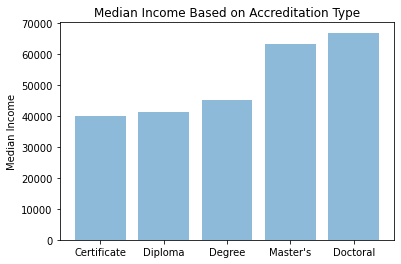

In [19]:
#Chart of average income based on accreditation type
objects = ('Certificate', 'Diploma', 'Degree', "Master's", 'Doctoral')
y_pos = np.arange(len(objects))
performance = [A,B,C,D,E]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Median Income')
plt.title('Median Income Based on Accreditation Type')

#Conclusion
Accreditation type does affect the new graduate's median income. And from the graph we can see that higher education tends to have higher median income in general, and Doctoral and Master are much higher than certificcate, Diploma and Degree type.